<a href="https://colab.research.google.com/github/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L01_Introduction_to_Machine_Learning/L01a_Introduction_to-Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note** that this document is created with the assistance of ChatGPT, a large language model trained by OpenAI (cutoff date: 2021). All information has been reviewed and approved by Farhad Davaripour and Armin Norouzi.

# 1. Supervised Learning - Regression

## 1.1 Linear Regression

### 1.1.1. Introduction

Linear regression is a statistical model that is used to predict a continuous response for a given predictor variable. It is a type of supervised learning algorithm in machine learning, which means that it is trained on labeled data, i.e. data that includes both input features (also known as predictors or independent variables) and a corresponding output or target variable (also known as the dependent variable).

In linear regression, the relationship between the predictor and the response is modeled using a linear function, which is a straight line. The model estimates the parameters of the linear function by minimizing the difference between the predicted values and the observed values of the response variable. The goal of linear regression is to find the line of best fit that accurately represents the relationship between the predictor and the response variables, so that we can use it to make predictions about the response for new values of the predictor.

Linear regression is a simple and widely used statistical method for predicting a continuous response. It is useful for understanding the relationship between different variables, and can be used for a variety of applications, such as predicting stock prices, analyzing the relationship between consumer spending and income, or predicting the probability of an event occurring.

The equation of a linear regression model has the following format:

$$
\hat{y} = \theta_{0} + \theta_{1}*x_{1} + \theta_{2}*x_{2} + ... + \theta_{n}*x_{n}
$$

where:

- y is the dependent variable (the variable we are trying to predict)
- $x_1$, $x_2$, ..., $x_n$ are the independent variables (also called the predictor variables or features)
- $\theta_0$ is the intercept, which is the value of y when all of the x variables are equal to 0
- $\theta_1$, $\theta_2$, ..., $\theta_n$ are the coefficients or weights, which represent the strength and direction of the relationship between each x variable and y

The equation could be simplified in the following form:

$$
\hat{y} = \theta_0 + \mathbf{\theta}^T  \mathbf{x}
$$

and then:
$$
    \hat{y} = \theta_0 +  \mathbf{\theta}^T  \mathbf{x} =
    \begin{bmatrix}
    \theta_0 &  \mathbf{\theta}^T
    \end{bmatrix}
    \begin{bmatrix}
    1\\
     \mathbf{x}
    \end{bmatrix}.
$$



**Using Mean Squared Error (MSE) loss**

The mean squared error (MSE) loss function is a measure of the difference between the predicted values and the actual values in a regression problem. It is defined as the mean of the squared differences between the predicted values $\hat{y}$ and the actual values y:

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$


The MSE loss function is commonly used in linear regression models to measure the accuracy of the model and to optimize the model parameters during training. To minimize the MSE  we need to find the values of the coefficients that minimize the MSE loss function:

\begin{equation}
\begin{split}
     \underset{ \mathbf{\theta}}{\min}
     \frac{1}{n}\sum_{i=1}^{n} \left( y_i -  \mathbf{\theta}^T  \mathbf{x}_i \right)^2
\end{split}
\end{equation}

This can be done by taking the derivative of the MSE loss function with respect to each coefficient and setting it to 0:

$$
\frac{\partial L(\hat{y}, y)}{\partial \theta_j} = 0
$$



### 1.1.2 Example of Linear Regression with Single Feature


To generate a dataset for a linear regression problem, you can use the make_regression function from the sklearn.datasets module.

Below is an example of how you can use this function. This will generate a dataset with 100 samples and 1 feature (predictor variable), and the target variable (response variable) will be generated by adding some noise to a linear function of the predictor variable. The noise parameter controls the amount of noise added to the target variable.

In [1]:
# Clear all previous variables
%reset -f

In order to generate dataset, we will use `make_regression` function from `sklearn.datasets`. In this call we used four parameters:

1. `n_samples`: The number of samples to generate. In this case, 200 samples will be generated.
2. `n_features`: The number of features for each sample. Here, only one feature will be generated for each sample.
3. `noise`: The standard deviation of the Gaussian noise applied to the output. In this case, the output values will be perturbed by a Gaussian noise with a standard deviation of 20.
4. `random_state`: The random seed used to generate the dataset. This is set to 42 so that the same dataset can be generated each time the script is run. 

In [2]:
import numpy as np
from sklearn.datasets import make_regression

# Generate the dataset
X_lr, y_lr = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Print the shape of the generated data
print("Shape of X:", X_lr.shape)
print("Shape of y:", y_lr.shape)

Shape of X: (200, 1)
Shape of y: (200,)


Let's plot this dataset to see target vs predictor variable:

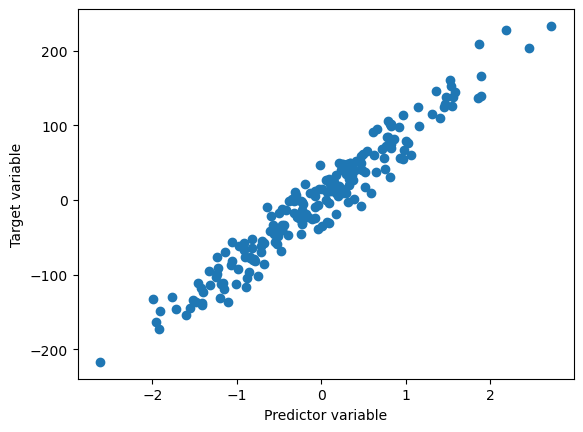

In [3]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(X_lr, y_lr)

plt.xlabel('Predictor variable')
plt.ylabel('Target variable')

plt.show()

Let's devide dataset to train and test. We will use train dataset to train model and test to assess model. We are feeding `X_lr` and `y_lr` as inputs of `train_test_split` function as well as `test_size` and `random_state`.  `test_size` is the proportion of the dataset to include in the test set. In our case, 20% of the dataset is reserved for the test set. `random_state` is the random seed used to split the dataset. This is set to 42 so that the same split can be obtained each time the script is run.

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

Let's use the cost function and gradient descent algorithm to find the optimal values of the coefficients for a linear regression model.

In [10]:
def mse_cost_function(X, y, theta):
    """
    Compute the mean squared error (MSE) cost function for linear regression.

    Parameters:
    -----------
    X : numpy.ndarray
        The input feature matrix of shape `(m, n)` where `m` is the number of samples and `n` is the number of features.
    y : numpy.ndarray
        The true output values of shape `(m,)`.
    theta : numpy.ndarray
        The coefficients of shape `(n,)` to be learned.

    Returns:
    --------
    tuple
        A tuple of two elements, where the first element is the cost `J` and the second element is the predicted output `h`
        obtained by multiplying the input feature matrix `X` with the coefficients `theta`.
    """
    m = len(y)
    h = X.dot(theta)
    J = (1/(2*m))*np.sum((h-y)**2)
    return J

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the gradient descent algorithm for linear regression.

    Parameters:
    -----------
    X : numpy.ndarray
        The input feature matrix of shape `(m, n)` where `m` is the number of samples and `n` is the number of features.
    y : numpy.ndarray
        The true output values of shape `(m,)`.
    theta : numpy.ndarray
        The coefficients of shape `(n,)` to be learned.
    alpha : float
        The learning rate, a scalar value that determines the step size of each iteration.
    iterations : int
        The number of iterations to perform the gradient descent algorithm.

    Returns:
    --------
    tuple
        A tuple of three elements, where the first element is the learned coefficients `theta`,
        the second element is a numpy.ndarray of shape `(iterations,)` containing the history of
        the cost function `J` over the iterations, and the third element is a numpy.ndarray of
        shape `(iterations, n)` containing the history of the learned coefficients `theta` over
        the iterations.
    """
    m = len(y)
    J_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    
    for i in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - alpha * gradient
        J_history[i] = mse_cost_function(X, y, theta)
        theta_history[i, :] = theta

    return theta, J_history, theta_history

Let's prepare data for defined functions and campute the optimal values of theta using gradient descent:

In [12]:
# Add a column of ones to X
X_lr_train_up = np.c_[np.ones(len(X_lr_train)), X_lr_train]

# Set the learning rate and number of iterations
alpha = 0.01
iterations = 1000

# Initialize theta
theta = np.zeros(2)

# Compute the optimal values of theta using gradient descent
theta, J_history, theta_history= gradient_descent(X_lr_train_up, y_lr_train, theta, alpha, iterations)

Now, we can plot cost function:

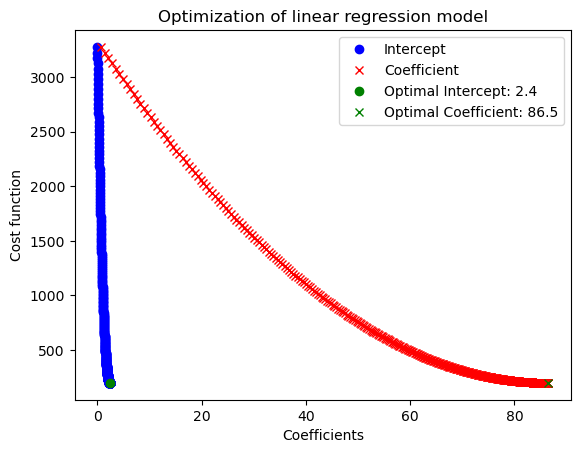

In [13]:
# Plot J_history against theta_history
plt.plot(theta_history[:, 0], J_history, 'bo')
plt.plot(theta_history[:, 1], J_history, 'rx')
plt.plot(theta[0], mse_cost_function(X_lr_train_up, y_lr_train, theta), 'go')
plt.plot(theta[1], mse_cost_function(X_lr_train_up, y_lr_train, theta), 'gx')
plt.xlabel('Coefficients')
plt.ylabel('Cost function')
plt.title('Optimization of linear regression model')
plt.legend(['Intercept', 'Coefficient', 'Optimal Intercept: {:.1f}'.format(theta[0]), 'Optimal Coefficient: {:.1f}'.format(theta[1])])
plt.show()

plt.show()

In [14]:
# Print the intercept and coefficient
print(f"Optimized intercept:, {round(theta[0],1)}")
print(f"Optimized coefficient:, {round(theta[1],1)}")

Optimized intercept:, 2.4
Optimized coefficient:, 86.5


We can then use the scikit-learn library to obtain the coefficients for the linear function and compare them with the ones obtained using the MSE cost function and gradient descent algorithm.

First we import the LinearRegression class from the linear_model module of the scikit-learn library. This class provides methods for fitting and predicting with a linear regression model. Then using `model_lr = LinearRegression()` we create an instance of the LinearRegression class and assign it to the variable `model_lr`. This creates an empty model with default settings. Now, we can use `fit` method to train our model. This method fits the linear regression model to the training data `X_lr_train` and `y_lr_train` using the `fit()` method of the `model_lr` object. This method computes the optimal values of the coefficients (θ values) using the least squares method.

In [15]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_lr = LinearRegression()

# Fit the model to the data
model_lr.fit(X_lr_train, y_lr_train)

# Get the coefficients of the model (θ values)
b0, b1 = model_lr.intercept_, model_lr.coef_
print(f'Optimized intercept is: {round(b0,1)}')
print(f'Optimized coefficient is: {round(b1[0],1)}')

Optimized intercept is: 2.4
Optimized coefficient is: 86.5


We can use `predict()` method and passing `X_lr_test`, to predict out test data.

In [16]:
# Predict using the model
y_lr_pred = model_lr.predict(X_lr_test)

Let's plot model versus actual data for test dataset.

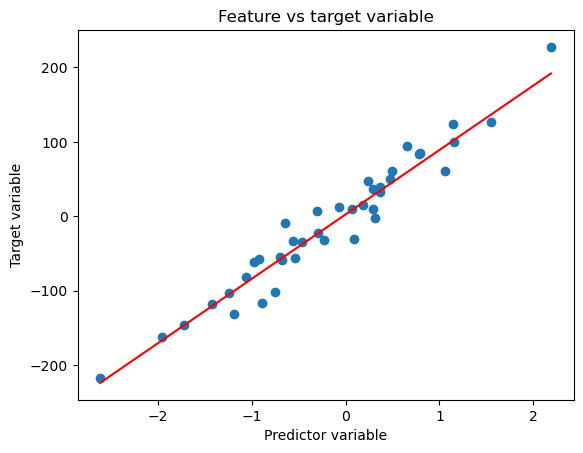

In [17]:
# Create a scatter plot of the test data
plt.scatter(X_lr_test, y_lr_test)

# Generate a range of x-values to plot the regression line
x_range = np.linspace(np.min(X_lr_test), np.max(X_lr_test), 100)

# Compute the y-values of the regression line
y_line = b0 + b1 * x_range

# Plot the regression line
plt.plot(x_range, y_line, 'r')

plt.title('Feature vs target variable')
plt.xlabel('Predictor variable')
plt.ylabel('Target variable')

plt.show()

The **actual vs. predicted** plot, also known as a residual plot, is an important tool for evaluating the performance of a regression model. It is a scatter plot that compares the predicted values from the model against the actual values in the test set. Each point on the plot represents an observation in the test set, and the position of the point represents the actual value on the x-axis and the predicted value on the y-axis.

The importance of the actual vs. predicted plot lies in its ability to visually identify the patterns and biases in the model's predictions. A well-fitting model should produce predictions that are close to the actual values, resulting in a scatter plot that is roughly linear with a slope of 1. If the model is underfitting, the plot will show a pattern of residuals that are systematically too high or too low. If the model is overfitting, the plot will show a random pattern of residuals that are spread out too far from the line.

The actual vs. predicted plot can also help identify outliers and influential points in the test set that may be affecting the model's performance. By visually inspecting the plot, we can gain insights into how the model is performing and make adjustments or improvements as necessary.

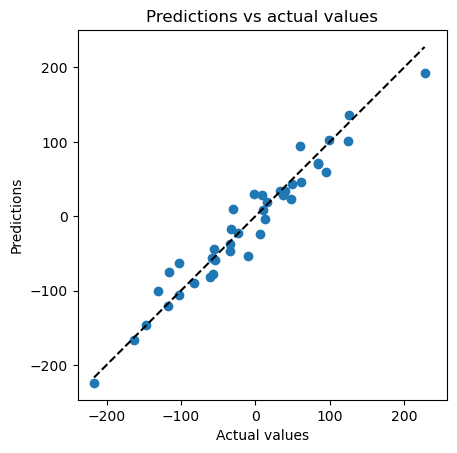

In [18]:
# Plot the predictions against the true values
plt.scatter(y_lr_test, y_lr_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_lr_test), np.max(y_lr_test), 2)
plt.plot(x, x, '--k')

plt.title('Predictions vs actual values')
plt.xlabel('Actual values')
plt.ylabel('Predictions')

plt.axis('square')
plt.show()

Finally we can evaluate our model using different metrics such as R-squared, Mean squared error, and Root mean squared error. 

R-squared, mean squared error (MSE), and root mean squared error (RMSE) are all commonly used evaluation metrics for regression models.

R-squared, also known as the coefficient of determination, is a measure of how well the regression model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables in the model. R-squared values range from 0 to 1, with higher values indicating a better fit.

Mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values of the dependent variable. It is calculated by taking the average of the squared errors of all the predictions. A lower MSE value indicates a better fit of the model to the data.

Root mean squared error (RMSE) is the square root of the MSE and is a commonly used evaluation metric for regression models. It represents the average distance between the predicted values and the actual values of the dependent variable. Like MSE, a lower RMSE value indicates a better fit of the model to the data. The advantage of RMSE over MSE is that it is in the same units as the dependent variable, making it easier to interpret.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the R-squared score
r2_lr = round(r2_score(y_lr_test, y_lr_pred),2)

# Compute the mean squared error
mse_lr = round(mean_squared_error(y_lr_test, y_lr_pred),2)

# Print the results
print("R-squared score:", r2_lr)
print("Mean squared error:", mse_lr)
print("Root mean squared error:", round(mse_lr**0.5,2))

R-squared score: 0.94
Mean squared error: 437.55
Root mean squared error: 20.92


Let's do statistical analysis on the model results using the OLS function from statsmodels. Note that when fitting a linear regression model using the OLS function from statsmodels, you can add a constant term to the predictor variables by using the add_constant function. The constant term, also known as the intercept, is the value of the response variable when all the predictor variables are zero. It allows the model to have a non-zero intercept even if all the predictor variables are zero.

In [20]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
X_train_with_const = sm.add_constant(X_lr_train)

# Fit the model using OLS (ordinary least squares)
model_lr = sm.OLS(y_lr_train, X_train_with_const)
results_lr = model_lr.fit()

# Print the summary
print(results_lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2474.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.01e-98
Time:                        12:51:11   Log-Likelihood:                -706.19
No. Observations:                 160   AIC:                             1416.
Df Residuals:                     158   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4461      1.590      1.539      0.1

In [21]:
# Extract the coefficients
coef_lr = results_lr.params
print("Coefficients (coef):", coef_lr)

# Extract the standard errors of the coefficients
se_lr = results_lr.bse
print("standard errors of the coefficients (std err):", se_lr)

# Extract the t-values of the coefficients
t_lr = results_lr.tvalues
print("t-values (t):", t_lr)

# Extract the p-values of the coefficients
p_lr = results_lr.pvalues
print("p-values (P>|t|):", p_lr)

Coefficients (coef): [ 2.44610218 86.51154198]
standard errors of the coefficients (std err): [1.5896194  1.73920238]
t-values (t): [ 1.53879739 49.74207878]
p-values (P>|t|): [1.25854051e-01 2.00882011e-98]


The OLS function from statsmodels fits a linear regression model to the data using ordinary least squares and returns a results object that contains various statistical measures of the model. Here is a description of some of the important parameters in the results object:

- Coef: This is an array of the coefficients of the model. The first element is the intercept term, and the remaining elements are the coefficients of the predictor variables.

- std err: This is an array of the standard errors of the coefficients. The standard error is a measure of the uncertainty in the estimate of the coefficient.

- t: This is an array of the t-values of the coefficients. The t-value is the coefficient divided by its standard error.

- P>|t|: This is an array of the p-values of the coefficients. The p-value is the probability that the coefficient is zero or that the observed value of the coefficient would be obtained by chance if the true coefficient is zero.

To assess the significance of the coefficients, you can perform hypothesis tests using the t-values and p-values. For example, you can perform a t-test to test the null hypothesis that the coefficient is zero. If the p-value is smaller than a pre-specified significance level (e.g., 0.05), then you can reject the null hypothesis and conclude that the coefficient is significantly different from zero.

You can also use the conf_int function to compute confidence intervals for the coefficients. A confidence interval is an interval estimate of the true value of the coefficient that is likely to contain the true value with a certain probability (e.g., 95%). If the interval does not contain zero, then the coefficient is significantly different from zero at the specified significance level. Note that the interval values also exist in the ols summary report.

Below is an example of how you can perform a t-test and compute confidence intervals for the coefficients. This will print the t-values, p-values, and confidence intervals for the coefficients, and it will also perform a t-test for each coefficient to test the hypothesis that it is zero. If the p-value is smaller than 0.05, it will print a message indicating that the coefficient is significantly different from zero.

In [22]:
# Compute the confidence intervals for the coefficients
conf_int = results_lr.conf_int()

# Print the t-values, p-values, and confidence intervals
print("t-values:", results_lr.tvalues)
print("p-values:", results_lr.pvalues)
print("Confidence intervals:", conf_int)

# Test the hypothesis that the coefficient is zero
for i, p in enumerate(results_lr.pvalues):
    if p < 0.05:
        print(f"Coefficient {i} is significantly different from zero")
    else:
        print(f"Coefficient {i} is not statistically significant and does not make a meaningful contribution to the model")

t-values: [ 1.53879739 49.74207878]
p-values: [1.25854051e-01 2.00882011e-98]
Confidence intervals: [[-0.69354249  5.58574686]
 [83.07645714 89.94662682]]
Coefficient 0 is not statistically significant and does not make a meaningful contribution to the model
Coefficient 1 is significantly different from zero


### 1.1.3 Example of Linear Regression with Multiple Features

To add a feature to the linear regression model in the previous example, you can simply generate a new dataset with the desired number of features using the make_regression function from sklearn.datasets.

In [23]:
# Clear all previous variables
%reset -f

In [24]:
import numpy as np
from sklearn.datasets import make_regression

# Generate the dataset with 20 features
X_mlr, y_mlr = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_mlr = LinearRegression()

# Fit the model to the data
results_mlr = model_mlr.fit(X_mlr_train, y_mlr_train)

# Predict using the model
y_mlr_pred = model_mlr.predict(X_mlr_test)

# Get the coefficients of the model
b0, b1, b2 = results_mlr.intercept_, results_mlr.coef_[0], results_mlr.coef_[1]
print('Intercept is: ', round(b0,2), '\nfirst coefficient is: ',round(b1,2), '\nsecond coefficient is: ',round(b2,2))

Intercept is:  -1.86 
first coefficient is:  -0.56 
second coefficient is:  -0.89


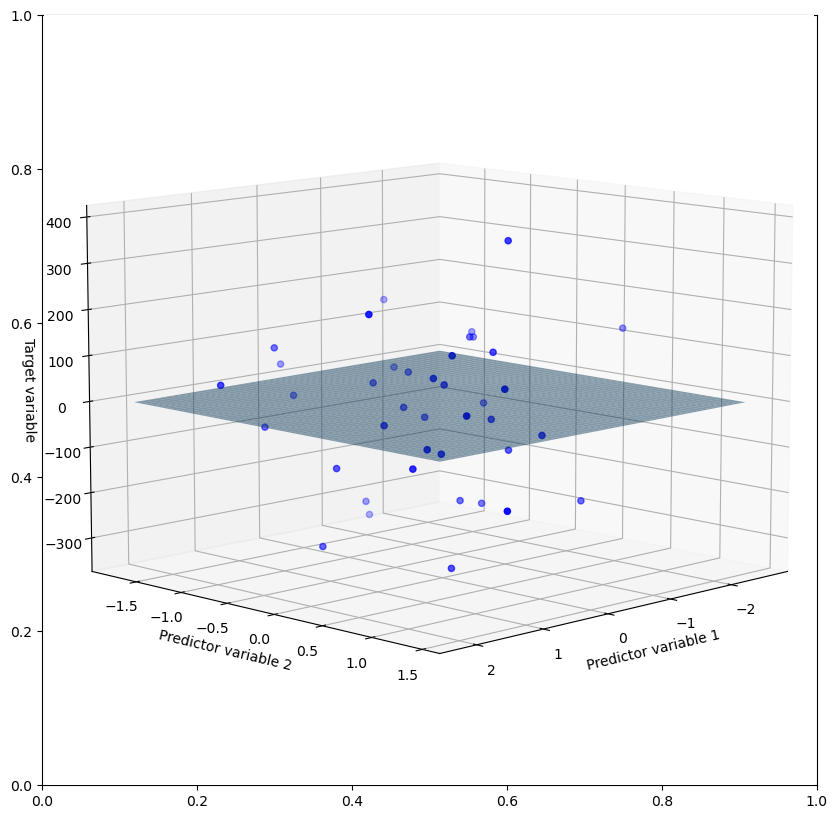

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(10,10))

# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mlr_test[:, 0], X_mlr_test[:, 1], y_mlr_test, c='blue', marker='o', label='True values')

# Generate a range of x1-values and x2-values to plot the regression surface
x1_range = np.linspace(np.min(X_mlr_test[:, 0]), np.max(X_mlr_test[:, 0]), 100)
x2_range = np.linspace(np.min(X_mlr_test[:, 1]), np.max(X_mlr_test[:, 1]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute the y-values of the regression surface
y_surface = b0 + b1 * x1_mesh + b2 * x2_mesh

# Plot the regression surface
ax.plot_surface(x1_mesh, x2_mesh, y_surface, alpha=0.5)
ax.view_init(elev=10, azim=45)

ax.set_xlabel('Predictor variable 1')
ax.set_ylabel('Predictor variable 2')
ax.set_zlabel('Target variable')

plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_mlr_test, y_mlr_pred)
mae_mlr = mean_absolute_error(y_mlr_test, y_mlr_pred)

# Print the results
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.98
Mean Absolute Error: 14.10
Root mean Absolute Error: 3.76


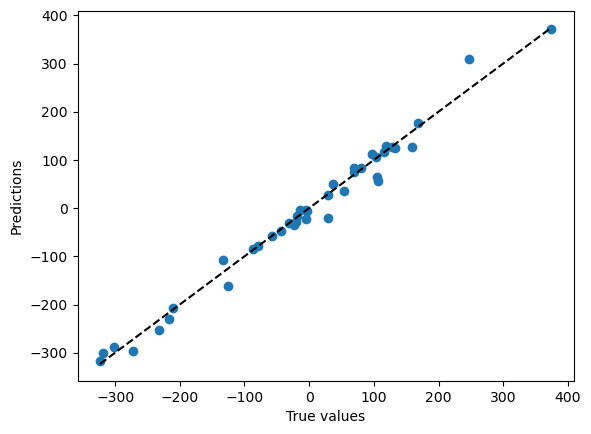

In [29]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_mlr_test, y_mlr_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_mlr_test), np.max(y_mlr_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

## 1.2 Polynomial Regression

Polynomial regression is a non-linear regression model that can capture more complex relationships between the predictor variable(s) and the target variable by using higher-order polynomial functions (quadratic, cubic, etc.) to fit the data. Polynomial regression can be more flexible than linear regression, as it can fit data that is not linearly related. However, polynomial regression can be more prone to overfitting, and it can be harder to interpret the model parameters compared to linear regression. In general, polynomial regression can be useful when the relationship between the predictor and target variable is non-linear, but linear regression may be more appropriate when the relationship is linear.

In [30]:
# Clear all previous variables
%reset -f

[]

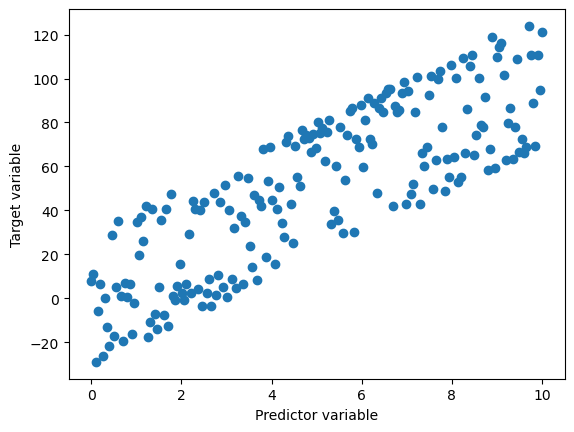

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate original data
X_poly = np.linspace(0,10,200)
y_poly = 10* X_poly

# Add random noise to y_poly
noise = np.random.normal(0, 3, size=len(y_poly))
y_poly = y_poly + 30*np.cos(noise)

# Plot the noised data
plt.scatter(X_poly, y_poly)
plt.xlabel('Predictor variable')
plt.ylabel('Target variable')
plt.plot()

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial model
deg = 16
poly = PolynomialFeatures(degree=deg, include_bias=False)

# Transform the features
X_poly_train_tr = poly.fit_transform(X_poly_train.reshape(-1, 1))
X_poly_test_tr = poly.fit_transform(X_poly_test.reshape(-1, 1))

# Create a linear regression model
poly_reg_model = LinearRegression()

# # Fit the model to the data
results_poly = poly_reg_model.fit(X_poly_train_tr, y_poly_train)

# # Predict using the model
y_poly_pred = poly_reg_model.predict(X_poly_test_tr)

In [34]:
# Get the coefficients and intercept
coefficients = results_poly.coef_
print(f'coefficients are {[round(i, 2) for i in coefficients]}')

intercept = results_poly.intercept_
print(f'intercept is {round(intercept,2)}')

coefficients are [2.12, 2.61, 3.19, 2.11, -0.23, -2.11, -0.68, 2.2, -1.37, 0.45, -0.09, 0.01, -0.0, 0.0, -0.0, 0.0]
intercept is -3.11


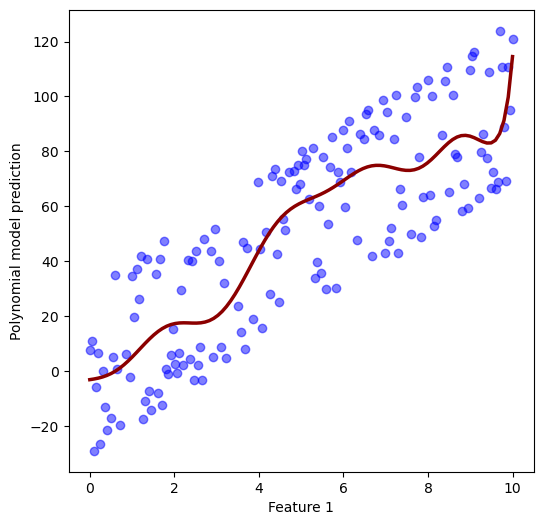

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

# Create a 2D scatter plot of the data
ax.scatter(X_poly_train_tr[:, 0], y_poly_train, c='blue', marker='o', label='True values', alpha = 0.5)

# Generate a range of X_poly_train values
x_range = np.linspace(X_poly_train.min(), X_poly_train.max(), 100)

# Transform the range of X_poly_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_poly_train values
y_range_pred = poly_reg_model.predict(x_range_tr)

# Plot the predicted values on the 2D scatter plot
ax.plot(x_range_tr[:,0], y_range_pred, color='darkred', linewidth =2.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Polynomial model prediction')

plt.show()


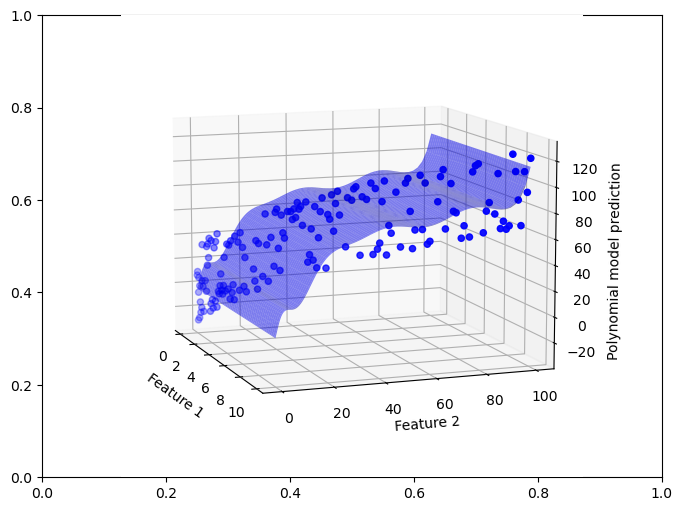

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(8,6))

# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-20)
ax.scatter(X_poly_train_tr[:, 0], X_poly_train_tr[:, 1], y_poly_train, c='blue', marker='o', label='True values')

# Generate a range of X_poly_train values
x_range = np.linspace(X_poly_train.min(), X_poly_train.max(), 100)

# Transform the range of X_poly_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_poly_train values
y_range_pred = poly_reg_model.predict(x_range_tr)

# Create a meshgrid of the X_poly_train and predicted Y values
X, Y = np.meshgrid(np.array([i[0] for i in x_range_tr]), np.array([i[1] for i in x_range_tr]))

# Create the 3D plot
ax.plot_surface(X, Y, y_range_pred.reshape(-1,1), color='b', alpha = 0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Polynomial model prediction')

plt.show()

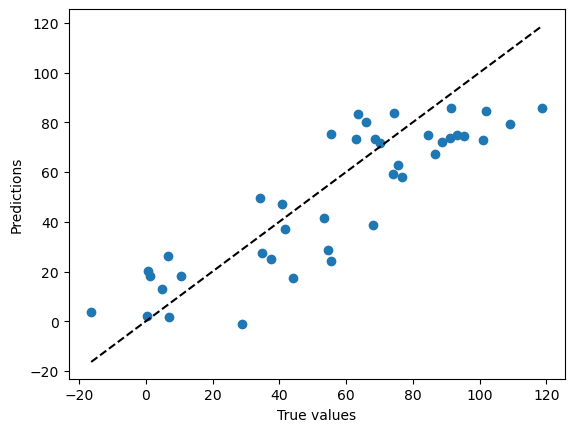

In [37]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_poly_test, y_poly_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_poly_test), np.max(y_poly_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_poly_test, y_poly_pred)
mae_mlr = mean_absolute_error(y_poly_test, y_poly_pred)

# Print the results 
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.72
Mean Absolute Error: 16.07
Root mean Absolute Error: 4.01


Given the very high polynomial degree used in this example, there is a noticeable overfitting of training data. In other words the model fits the training data well, but performs poorly on new data. To mitigate this problem, one solution is to reduce the degree of the polynomial, which can result in a simpler model that is less prone to overfitting. Another solution is to use regularization techniques such as Lasso regression, which adds a penalty term to the cost function that discourages the model from using too many features. This can help to prevent overfitting by reducing the complexity of the model and making it more generalizable to new data. Overall, selecting an appropriate polynomial degree and applying regularization can help to balance the trade-off between model complexity and overfitting, leading to better performance on new data.

## 1.3 Lasso Regression

Lasso regularization is a type of linear regression that uses regularization. It helps to reduce the complexity of the model and prevent overfitting by adding a penalty term to the objective function. The penalty term is the sum of the absolute values of the coefficients of the features, multiplied by a regularization hyperparameter alpha. The higher the value of alpha, the stronger the regularization, and the smaller the values of the coefficients. This can lead to a more parsimonious model, where some of the features may have zero coefficients, which means they are not important for predicting the target.

Here is an example of using the lasso regreggion model to overcome the overfitting in the above example with polynomial regression.

In [39]:
# Clear all previous variables
%reset -f

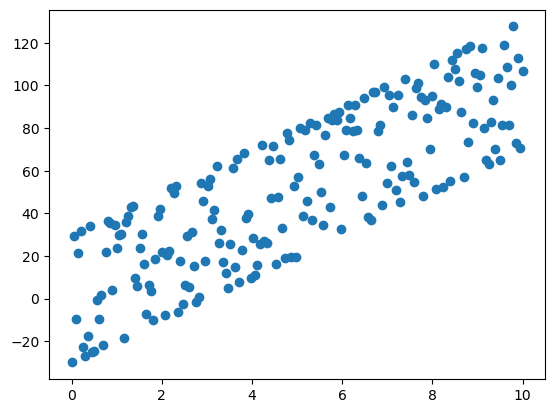

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generate original data
X_lasso = np.linspace(0,10,200)
y_lasso = 10* X_lasso

# Add random noise to y_lasso
noise = np.random.normal(0, 3, size=len(y_lasso))
y_lasso = y_lasso + 30*np.cos(noise)

# Plot the noised data
plt.scatter(X_lasso, y_lasso)

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

In this part, we will use grid search to find optimal hyperparameters of lasso model. 

Grid search is a hyperparameter tuning technique used in machine learning to find the optimal combination of hyperparameters for a model. Hyperparameters are model parameters that are set before training the model and cannot be learned from the data. Examples of hyperparameters include the learning rate, number of hidden layers in a neural network, regularization parameter, and so on.

Grid search involves defining a grid of hyperparameter values and training a model for each combination of values in the grid. The grid is defined by specifying a range of values for each hyperparameter. For example, if we want to tune the learning rate and regularization parameter for a neural network, we can define a grid that includes different values for both hyperparameters. Then, we train the neural network using all possible combinations of these hyperparameters and evaluate their performance using a validation set.

The performance metric used to evaluate each combination of hyperparameters can be any metric that is relevant to the problem, such as accuracy, precision, recall, F1 score, mean squared error, etc. The combination of hyperparameters that gives the best performance on the validation set is selected as the final model.

Grid search is a brute-force approach to hyperparameter tuning and can be computationally expensive if the search space is large. However, it is a simple and effective technique that can be used to find a good set of hyperparameters for a model. Other hyperparameter tuning techniques, such as random search and Bayesian optimization, can be used to reduce the computational cost of hyperparameter tuning.

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a polynomial model
poly = PolynomialFeatures(degree=16, include_bias=False)

# Transform the features
X_lasso_train_tr = poly.fit_transform(X_lasso_train.reshape(-1, 1))
X_lasso_test_tr = poly.fit_transform(X_lasso_test.reshape(-1, 1))

# Create a lasso model
lasso_model = Lasso(max_iter=10000, tol = 0.8)

# Define the parameter range for alpha
param_grid = {'alpha': np.linspace(10**-5, 10, num=20)}

# Use GridSearchCV to find the optimal alpha
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, verbose = 4)

# Fit the model to the data
results_lasso = grid_search.fit(X_lasso_train_tr, y_lasso_train)

# Get the best alpha
best_alpha = results_lasso.best_params_['alpha']
print(f'best alpha is {best_alpha}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......................alpha=1e-05;, score=0.637 total time=   0.0s
[CV 2/5] END .......................alpha=1e-05;, score=0.654 total time=   0.0s
[CV 3/5] END .......................alpha=1e-05;, score=0.666 total time=   0.0s
[CV 4/5] END .......................alpha=1e-05;, score=0.705 total time=   0.0s
[CV 5/5] END .......................alpha=1e-05;, score=0.657 total time=   0.0s
[CV 1/5] END ..........alpha=0.5263252631578947;, score=0.637 total time=   0.0s
[CV 2/5] END ..........alpha=0.5263252631578947;, score=0.654 total time=   0.0s
[CV 3/5] END ..........alpha=0.5263252631578947;, score=0.666 total time=   0.0s
[CV 4/5] END ..........alpha=0.5263252631578947;, score=0.705 total time=   0.0s
[CV 5/5] END ..........alpha=0.5263252631578947;, score=0.657 total time=   0.0s
[CV 1/5] END ..........alpha=1.0526405263157896;, score=0.638 total time=   0.0s
[CV 2/5] END ..........alpha=1.0526405263157896

This code performs Lasso regression with polynomial features and uses grid search to find the optimal value of the `L1` regularization parameter, `alpha`.

First, the code imports the necessary modules from scikit-learn: `PolynomialFeatures`, `Lasso`, and `GridSearchCV`.

Then, a `PolynomialFeatures` object is created with degree=16 to transform the features into polynomial features. The transform method of this object is used to transform the training and test features.

Next, a Lasso object is created. This will be used to perform Lasso regression on the transformed features.

A dictionary called param_grid is defined, which specifies a range of values for the L1 regularization parameter, alpha. The range of values is defined using `np.linspace`, which generates 300 equally spaced values between `10^-5` and `10`.

`GridSearchCV` is then used to perform a grid search over the parameter range defined in param_grid. The Lasso object and the parameter grid are passed as arguments to `GridSearchCV`, along with `cv=5`, which specifies that 5-fold cross-validation should be used to evaluate the performance of each combination of hyperparameters.

The fit method of the `GridSearchCV` object is called with the training data to fit the model to the data and find the optimal value of alpha. The best value of alpha is obtained using the best_params_ attribute of the `GridSearchCV` object.

Finally, the code prints the best value of alpha found by grid search.

In [98]:
# Use the best alpha to make predictions
lasso_model = Lasso(max_iter=10000, tol = 0.4, alpha=best_alpha)
lasso_model.fit(X_lasso_train_tr, y_lasso_train)
y_lasso_pred = lasso_model.predict(X_lasso_test_tr)

In [99]:
# Get the coefficients and intercept
coefficients = lasso_model.coef_
print(f'coefficients are {[round(i, 3) for i in coefficients]}')

intercept = lasso_model.intercept_
print(f'intercept is {round(intercept,2)}')

coefficients are [10.897, -0.022, -0.002, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
intercept is 0.46


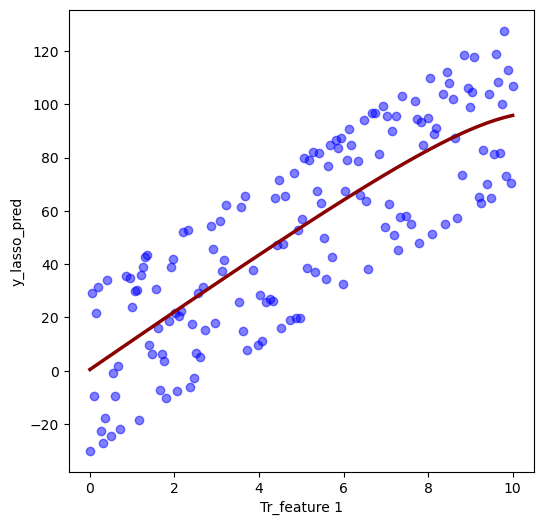

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

# Create a 2D scatter plot of the data
ax.scatter(X_lasso_train_tr[:, 0], y_lasso_train, c='blue', marker='o', label='True values', alpha= 0.5)

# Generate a range of X_lasso_train values
x_range = np.linspace(X_lasso_train.min(), X_lasso_train.max(), 100)

# Transform the range of X_lasso_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_lasso_train values
y_range_pred = lasso_model.predict(x_range_tr)

# Plot the predicted values on the 2D scatter plot
ax.plot(x_range_tr[:,0], y_range_pred, color='darkred', linewidth =2.5)
ax.set_xlabel('Tr_feature 1')
ax.set_ylabel('y_lasso_pred')

plt.show()


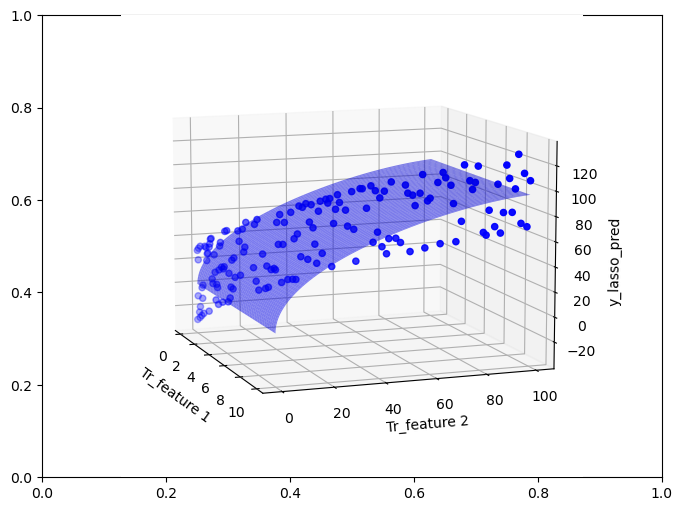

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(8,6))


# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-20)
ax.scatter(X_lasso_train_tr[:, 0], X_lasso_train_tr[:, 1], y_lasso_train, c='blue', marker='o', label='True values')

# Generate a range of X_lasso_train values
x_range = np.linspace(X_lasso_train.min(), X_lasso_train.max(), 100)

# Transform the range of X_lasso_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_lasso_train values
y_range_pred = lasso_model.predict(x_range_tr)

# Create a meshgrid of the X_lasso_train and predicted Y values
X, Y = np.meshgrid(np.array([i[0] for i in x_range_tr]), np.array([i[1] for i in x_range_tr]))

# Create the 3D plot
ax.plot_surface(X, Y, y_range_pred.reshape(-1,1), color='b', alpha = 0.5)
ax.set_xlabel('Tr_feature 1')
ax.set_ylabel('Tr_feature 2')
ax.set_zlabel('y_lasso_pred')

plt.show()


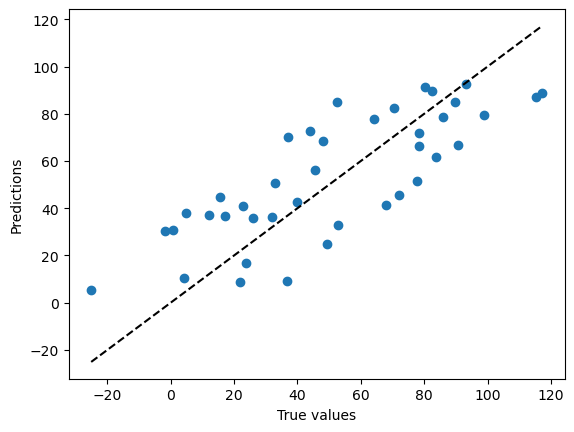

In [102]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_lasso_test, y_lasso_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_lasso_test), np.max(y_lasso_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_lasso_test, y_lasso_pred)
mae_mlr = mean_absolute_error(y_lasso_test, y_lasso_pred)

# Print the results
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.62
Mean Absolute Error: 18.78
Root mean Absolute Error: 4.33


Placeholder to compare the results from polynomial model versus those using lasso regression.

## 1.1.4 Decision Tree Regression

Decision tree regressor is a supervised learning model that predicts a continuous target variable based on a set of input features. The model builds a decision tree by recursively splitting the data into subsets based on the value of a selected feature, such that the subsets have the highest possible purity in terms of the target variable. The splits are chosen to minimize the variance in the target variable, which is the sum of the squared differences between the actual and predicted values. Once the tree is built, new data points are classified by following the splits in the tree until reaching a leaf node, which provides the predicted value for the target variable. Decision trees are interpretable and can capture non-linear relationships between the features and the target variable. However, they are prone to overfitting and can be sensitive to the choice of the hyperparameters. While decision trees can be used for both classification and regression problems, they are more commonly associated with classification because they are particularly effective at handling categorical variables and creating easily interpretable models.

How it works
The basic idea behind a decision tree is to recursively partition the data into subsets based on the values of the input features. At each node of the tree, a decision is made based on the value of a single feature. This decision determines which branch to follow down the tree. The process continues until a leaf node is reached, which represents a final decision or prediction.

The algorithm for constructing a decision tree can be summarized as follows:

1. Choose a feature from the dataset that best splits the data into separate classes.
2. Create a decision node based on that feature.
3. For each possible value of the feature, create a branch from the decision node to a new subtree.
4. Recursively repeat steps 1-3 for each new subtree until a stopping criterion is met (e.g. maximum depth of the tree, minimum number of samples per leaf node).

Impurity Measures
To determine which feature is the best one to use for splitting the data, we need to define an impurity measure that quantifies how "pure" or homogeneous the subsets of data are after the split. The most common impurity measures are:

**Entropy**
Entropy is a measure of the disorder or randomness in a set of data. Given a set of data $D$, the entropy $H(D)$ is defined as:

$H(D) = - \sum_{i = 1}^{|C|} p_i \log(p_i) $


where $|C|$ is the number of classes, and $p_i$ is the proportion of data points in class $i$.

**Gini Impurity**
Gini impurity is a measure of how often a randomly chosen element from a set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Given a set of data $D$, the Gini impurity $G(D)$ is defined as:

$H(D) = - \sum_{i = 1}^{|C|} p_i^2 $

where $|C|$ is the number of classes, and $p_i$ is the proportion of data points in class $i$.

**Decision tree diagram**
A decision tree can be visualized as a diagram with nodes and edges that represent the decision rules and the splits, respectively. Here is an example of a decision tree for a classification task:

              Humidity
              /      \
        Normal        High
        /    \       /   \
      Windy  Sunny  Windy Rainy
      /  \    /  \   /  \   /  \
    No  Yes Yes  No No Yes Yes Yes


In this tree, the decision rules are based on the features "Humidity" and "Windy", and the labels are either "Yes" or "No". For example, if the humidity is normal and the wind is not windy, the prediction is "No". The tree has a depth of 3 and 8 leaves.

Below provides an example of using decision tree in a multi variable problem.

In [104]:
# Clear all previous variables
%reset -f

In [107]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from graphviz import Source

In [108]:
# Generate the dataset with 20 features
X_dt, y_dt = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [109]:
# Split the data into training and test sets
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [110]:
# Create a decision tree regressor model
model_dt = DecisionTreeRegressor(random_state=42)

AS we already learned so dar, hyperparameters are parameters of a machine learning algorithm that cannot be learned from the training data, but rather need to be set prior to training. In the case of decision trees, some important hyperparameters are:

1. `max_depth`: The maximum depth of the decision tree. This controls the complexity of the model and can help prevent overfitting. If set to None, nodes are expanded until all leaves are pure or contain less than min_samples_split samples.
2. `min_samples_split`: The minimum number of samples required to split an internal node. This can help prevent overfitting by requiring a minimum number of samples for a split to be considered.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node. This can help prevent overfitting by requiring a minimum number of samples in each leaf.
4. `max_features`: The maximum number of features to consider when making a split. This can help prevent overfitting by limiting the number of features that are considered at each split. If set to None, all features are considered.
5. `splitter`: The strategy used to choose the feature to split on at each node. The options are 'best' (chooses the best feature based on a scoring criterion) and 'random' (chooses a random feature).

The `param_grid` dictionary defines a range of values to search over for each hyperparameter. The `GridSearchCV` algorithm then fits a decision tree model for each combination of hyperparameters and evaluates it using cross-validation. The best set of hyperparameters is chosen based on the average cross-validation score.

The best hyperparameters are printed at the end of the code using the `best_params_` attribute of the `GridSearchCV` object.

In [114]:
# Define the parameter grid for hyper parameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
}

# Use GridSearchCV for hyper parameter tuning
#  set verbose to 4 to see all iterations of gridsearch
grid_search = GridSearchCV(model_dt, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_dt_train, y_dt_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Hyperparameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [115]:
# Fit the model to the data using the best hyper parameters
model_dt = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
results_dt = model_dt.fit(X_dt_train, y_dt_train)

# Predict using the model
y_dt_pred = model_dt.predict(X_dt_test)

Using decision tree model, we can see which features has more important to predict output:

In [117]:
# Get the feature importances of the model
features = ['Feature_'+str(i) for i in range(1,21)]
importances = model_dt.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature} importance: {importance:.3f}')

Feature_1 importance: 0.024
Feature_2 importance: 0.000
Feature_3 importance: 0.020
Feature_4 importance: 0.000
Feature_5 importance: 0.153
Feature_6 importance: 0.000
Feature_7 importance: 0.000
Feature_8 importance: 0.000
Feature_9 importance: 0.049
Feature_10 importance: 0.018
Feature_11 importance: 0.025
Feature_12 importance: 0.000
Feature_13 importance: 0.006
Feature_14 importance: 0.412
Feature_15 importance: 0.224
Feature_16 importance: 0.000
Feature_17 importance: 0.044
Feature_18 importance: 0.000
Feature_19 importance: 0.024
Feature_20 importance: 0.000


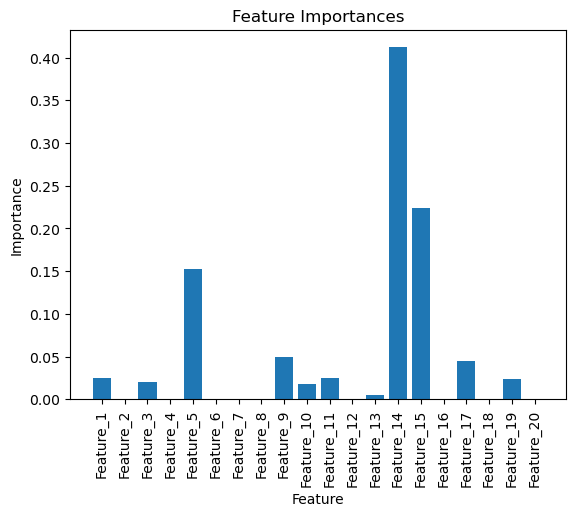

In [118]:
# Plot the feature importances
plt.bar(features, importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

In [119]:
# Calculate the mean absolute error and R^2 score
r2_dt = r2_score(y_dt_test, y_dt_pred)
mae_dt = mean_absolute_error(y_dt_test, y_dt_pred)

# Print the results
print(f"R^2 Score: {r2_dt:.2f}")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"Root mean Absolute Error: {mae_dt**0.5:.2f}")

R^2 Score: 0.47
Mean Absolute Error: 97.23
Root mean Absolute Error: 9.86


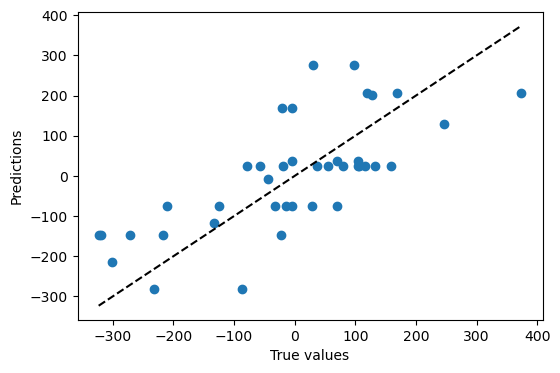

In [120]:
# Plot the predictions against the true values
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(y_dt_test, y_dt_pred)
x = np.linspace(np.min(y_dt_test), np.max(y_dt_test), 2)
plt.plot(x, x, '--k')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

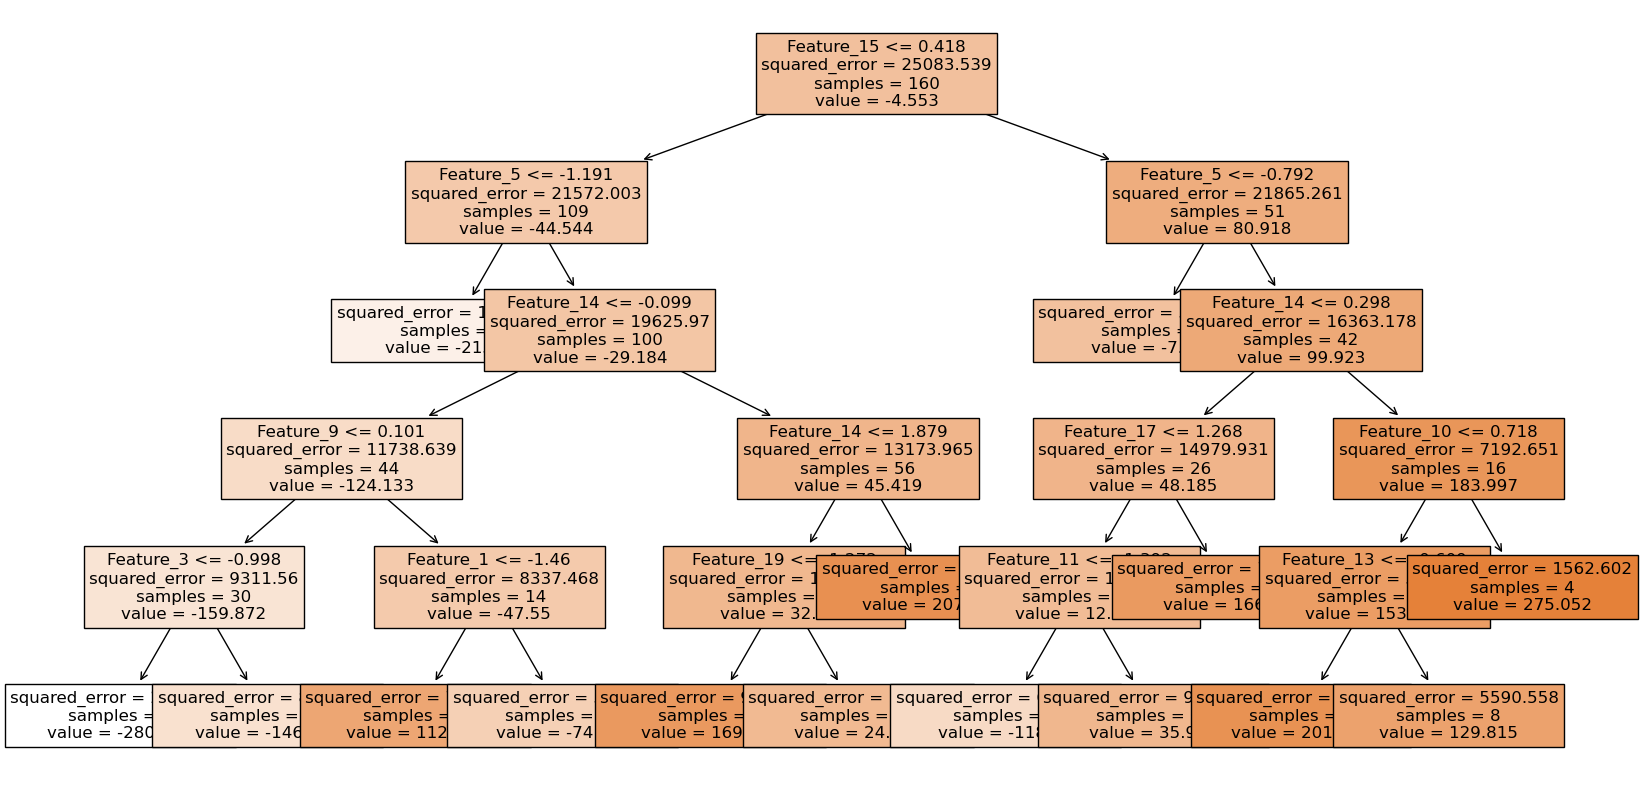

In [121]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(model_dt, feature_names=features, ax=ax, fontsize=12, filled=True)
plt.show()

In the visualization above each node in the tree represents a decision or a test on a particular feature, and the branches represent the outcomes of the test. The leaf nodes represent the final decision or prediction. The nodes are labeled with the squared error, and the number of samples that passed through the node. The value field in each node represents the distribution of the target variable in that node. The impurity field (squared error) in each node represents the degree of impurity in that node. The filled parameter in the plot_tree() function colors the nodes based on their impurity, with darker colors indicating higher impurity. By analyzing the decision tree, we can gain insights into the relationships between the features and the target variable, and identify the most important features for making accurate predictions.

## 1.1.5 Ensemble Learning

Ensemble learning is a machine learning technique that involves combining several individual models to improve the overall performance of the model. In ensemble learning, the idea is to use several weak models to create a strong model that is capable of making better predictions.

There are two main types of ensemble learning techniques: bagging and boosting.

**Bagging**

Bagging is a technique that involves training multiple independent models using different subsets of the training data. Each model is trained on a random subset of the training data, and the final prediction is the average of the predictions made by all of the models. The goal of bagging is to reduce the variance of the predictions by combining the predictions made by different models.

Random Forest is an example of a bagging algorithm. In Random Forest, multiple decision trees are trained on different subsets of the training data and features. The predictions of these trees are then combined to make the final prediction. Each decision tree is trained independently, and the final prediction is made by aggregating the predictions of all trees, usually by taking the mode (for classification) or mean (for regression).

**Boosting**

Boosting is a technique that involves training multiple models sequentially, with each model trying to correct the errors made by the previous model. In boosting, the data is reweighted between each iteration to give more importance to the misclassified data points. The final prediction is a weighted sum of the predictions made by all of the models. The goal of boosting is to reduce the bias of the model by combining the predictions made by different models.

AdaBoost is an example of a boosting algorithm. In AdaBoost, a series of weak learners (classifiers that perform slightly better than random guessing) are trained sequentially, where each subsequent learner is trained on the samples that the previous learner misclassified. The final prediction is then made by aggregating the predictions of all learners, weighted by their performance. The idea behind AdaBoost is to focus on the samples that are difficult to classify and to give them more weight in the subsequent iterations. By doing so, the algorithm can gradually improve the performance of the ensemble.

## 1.1.5.1 Random Forest Regression

Let's implement random forest regression. 

In [123]:
# Clear all previous variables
%reset -f

In [124]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [125]:
# Generate the dataset with 20 features
X_rf, y_rf = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [126]:
# Split the data into training and test sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [127]:
# Create a random forest regressor model
model_rf = RandomForestRegressor(random_state=42)

In [128]:
# Define the parameter grid for hyper parameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyper parameter tuning
grid_search = GridSearchCV(model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_rf_train, y_rf_train)

# Print the best hyper parameters
print("Best Hyper Parameters: ", grid_search.best_params_)

Best Hyper Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [129]:
# Fit the model to the data using the best hyper parameters
model_rf = RandomForestRegressor(random_state=42, **grid_search.best_params_)
results_rf = model_rf.fit(X_rf_train, y_rf_train)

# Predict using the model
y_rf_pred = model_rf.predict(X_rf_test)

In [130]:
# Calculate the mean absolute error and R^2 score
r2_rf = r2_score(y_rf_test, y_rf_pred)
mae_rf = mean_absolute_error(y_rf_test, y_rf_pred)

# Print the results
print(f"R^2 Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root mean Absolute Error: {mae_rf**0.5:.2f}")

R^2 Score: 0.77
Mean Absolute Error: 55.10
Root mean Absolute Error: 7.42


In [131]:
# Get the feature importances of the model
features = ['Feature_'+str(i) for i in range(1,21)]
importances = model_rf.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature} importance: {importance:.2f}')


Feature_1 importance: 0.01
Feature_2 importance: 0.01
Feature_3 importance: 0.01
Feature_4 importance: 0.02
Feature_5 importance: 0.08
Feature_6 importance: 0.01
Feature_7 importance: 0.01
Feature_8 importance: 0.05
Feature_9 importance: 0.11
Feature_10 importance: 0.06
Feature_11 importance: 0.01
Feature_12 importance: 0.01
Feature_13 importance: 0.01
Feature_14 importance: 0.46
Feature_15 importance: 0.10
Feature_16 importance: 0.01
Feature_17 importance: 0.01
Feature_18 importance: 0.01
Feature_19 importance: 0.01
Feature_20 importance: 0.01
R^2 Score: 0.77
Mean Absolute Error: 55.10
Root mean Absolute Error: 7.42


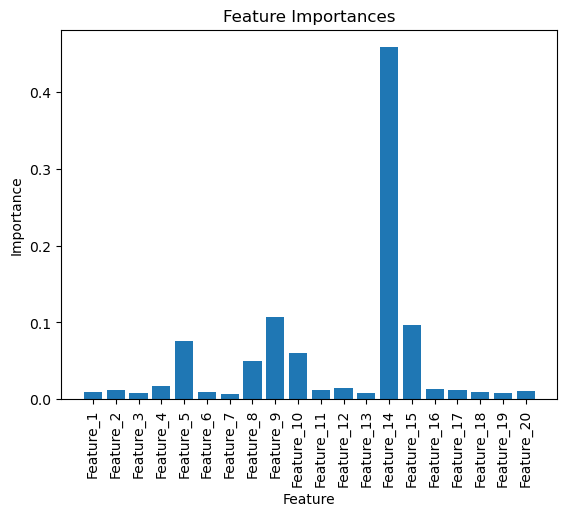

In [132]:
# Plot the feature importances
plt.bar(features, importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

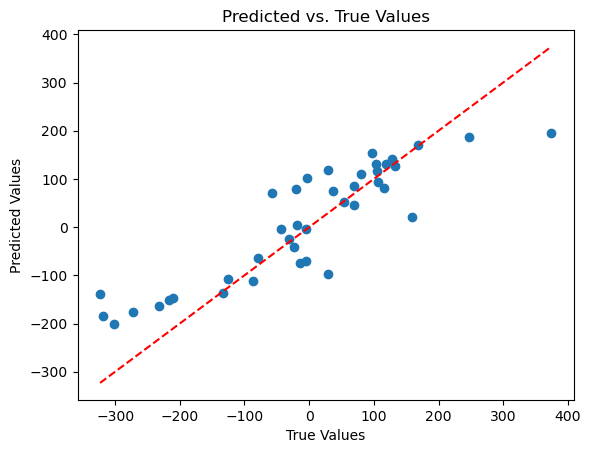

In [133]:
# Visualize the predicted values against the true values
plt.scatter(y_rf_test, y_rf_pred)
plt.plot([y_rf_test.min(), y_rf_test.max()], [y_rf_test.min(), y_rf_test.max()], 'r--')
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Based on the R^2 scores, it seems like the Random Forest model outperforms the Decision Tree model with a higher score of 0.77 compared to 0.47 for the Decision Tree. This indicates that the Random Forest model explains the variability of the target variable better than the Decision Tree model. Additionally, the Random Forest model also performs better in terms of Mean Absolute Error (MAE) and Root Mean Absolute Error (RMSE) with lower values for both metrics. This means that the Random Forest model has a smaller difference between the predicted and actual values of the target variable, which indicates that the model is more accurate.

In conclusion, the Random Forest model outperforms the Decision Tree model in terms of R^2 score, MAE, and RMSE. However, it's important to note that both models have their own strengths and weaknesses and the choice of model ultimately depends on the problem at hand and the specific requirements of the analysis. For example, if we require a model that is more interpretable and computationally efficient, a Decision Tree model may be a better choice. On the other hand, if we prioritize accuracy and robustness, a Random Forest model may be more appropriate.

## 1.1.5.2 Random Forest Regression

Let's implement random forest regression. 

In [ ]:
# Clear all previous variables
%reset -f

In [137]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [142]:
# Generate the dataset with 20 features
X_gbt, y_gbt = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [143]:
# Split the data into training and test sets
X_gbt_train, X_gbt_test, y_gbt_train, y_gbt_test = train_test_split(X_gbt, y_gbt, test_size=0.2, random_state=42)

In [144]:
# Create a GradientBoostingRegressor model
model_gbt = GradientBoostingRegressor(random_state=42)

In [145]:
# Define the parameter grid for hyper parameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyper parameter tuning
grid_search = GridSearchCV(model_gbt, param_grid=param_grid, cv=5)
grid_search.fit(X_gbt_train, y_gbt_train)

# Print the best hyper parameters
print("Best Hyper Parameters: ", grid_search.best_params_)

Best Hyper Parameters:  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [146]:
# Fit the model to the data using the best hyper parameters
model_gbt = RandomForestRegressor(random_state=42, **grid_search.best_params_)
results_gbt = model_gbt.fit(X_gbt_train, y_gbt_train)

# Predict using the model
y_gbt_pred = model_gbt.predict(X_rf_test)

In [147]:
# Calculate the mean absolute error and R^2 score
r2_gbt = r2_score(y_gbt_test, y_gbt_pred)
mae_gbt = mean_absolute_error(y_gbt_test, y_gbt_pred)

# Print the results
print(f"R^2 Score: {r2_gbt:.2f}")
print(f"Mean Absolute Error: {mae_gbt:.2f}")
print(f"Root mean Absolute Error: {mae_gbt**0.5:.2f}")

R^2 Score: 0.71
Mean Absolute Error: 62.22
Root mean Absolute Error: 7.89


In [148]:
# Get the feature importances of the model
features = ['Feature_'+str(i) for i in range(1,21)]
importances = model_gbt.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature} importance: {importance:.2f}')


Feature_1 importance: 0.00
Feature_2 importance: 0.00
Feature_3 importance: 0.00
Feature_4 importance: 0.01
Feature_5 importance: 0.07
Feature_6 importance: 0.00
Feature_7 importance: 0.00
Feature_8 importance: 0.04
Feature_9 importance: 0.12
Feature_10 importance: 0.05
Feature_11 importance: 0.00
Feature_12 importance: 0.01
Feature_13 importance: 0.00
Feature_14 importance: 0.59
Feature_15 importance: 0.10
Feature_16 importance: 0.01
Feature_17 importance: 0.00
Feature_18 importance: 0.00
Feature_19 importance: 0.00
Feature_20 importance: 0.00


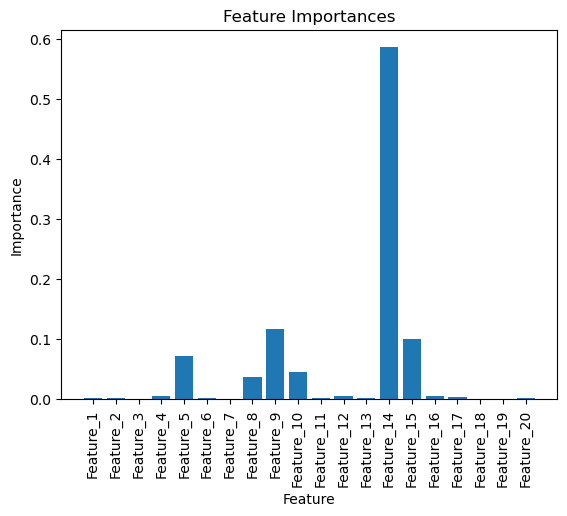

In [149]:
# Plot the feature importances
plt.bar(features, importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

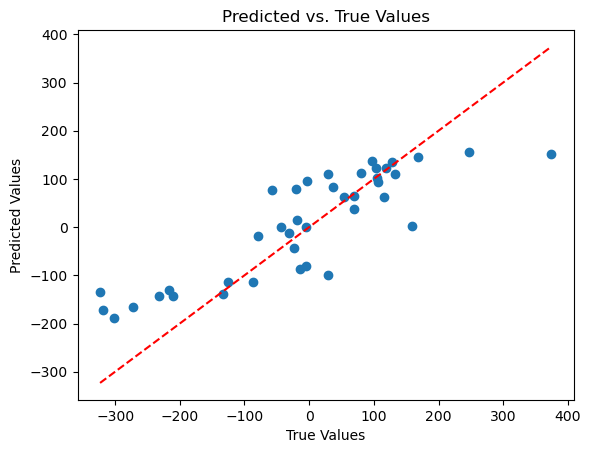

In [150]:
# Visualize the predicted values against the true values
plt.scatter(y_gbt_test, y_gbt_pred)
plt.plot([y_gbt_test.min(), y_gbt_test.max()], [y_gbt_test.min(), y_gbt_test.max()], 'r--')
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

The performance metrics for the decision tree model and gradient boosted tree model show that the gradient boosted tree model outperforms the decision tree model. The R^2 score for the gradient boosted tree model is 0.71 which is higher than that of the decision tree model which is 0.47. This indicates that the gradient boosted tree model explains more of the variance in the data compared to the decision tree model. Additionally, the mean absolute error for the gradient boosted tree model is 62.22 which is lower than that of the decision tree model which is 97.23. This means that on average, the gradient boosted tree model is making predictions that are closer to the actual values of the target variable compared to the decision tree model. The root mean absolute error for the gradient boosted tree model is 7.89 which is also lower than that of the decision tree model which is 9.86.

The results suggest that the gradient boosted tree model is a better choice for modeling the data compared to the decision tree model. The gradient boosted tree model is able to capture more complex relationships between the features and the target variable than the decision tree model. This is because the gradient boosted tree model uses multiple decision trees that are built sequentially to correct the errors of the previous trees. This allows the model to capture the nuances in the data that a single decision tree cannot. Additionally, the gradient boosted tree model is less prone to overfitting compared to the decision tree model because the trees are built sequentially, and each tree focuses on correcting the errors of the previous trees. Overall, the gradient boosted tree model provides more accurate predictions and is a more robust model for predicting the target variable compared to the decision tree model.

## References


[1] Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2019.

[2] https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[3] https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10#:~:text=Feature%20engineering%20is%20the%20process,design%20and%20train%20better%20features.